<a href="https://colab.research.google.com/github/MaxiPerrone/deep-learning/blob/main/4_Perceptron_clasificacion_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [ ]:
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3)

In [ ]:
print(len(X_train))
print(len(X_test))

49000
21000


In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

In [ ]:
clf.coef_.shape

(10, 784)

In [ ]:
clf.intercept_

array([-1158.,  -255., -1078., -3377.,  -564.,   879., -1490.,  -305.,
       -4204., -3438.])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_pred, y_test, average='weighted')

0.8538874703461462

In [ ]:
index = 0
errors = []

for label, predict in zip(y_test, y_pred):
  if label != predict:
    errors.append(index)
  index += 1

In [ ]:
y_test.index

Index([ 3694, 64920, 54322, 38565, 50920, 68269, 21758, 31243, 17968, 34418,
       ...
       19886, 11212, 62190, 22247, 28211, 28250, 60857, 34548, 23785, 61555],
      dtype='int64', length=21000)

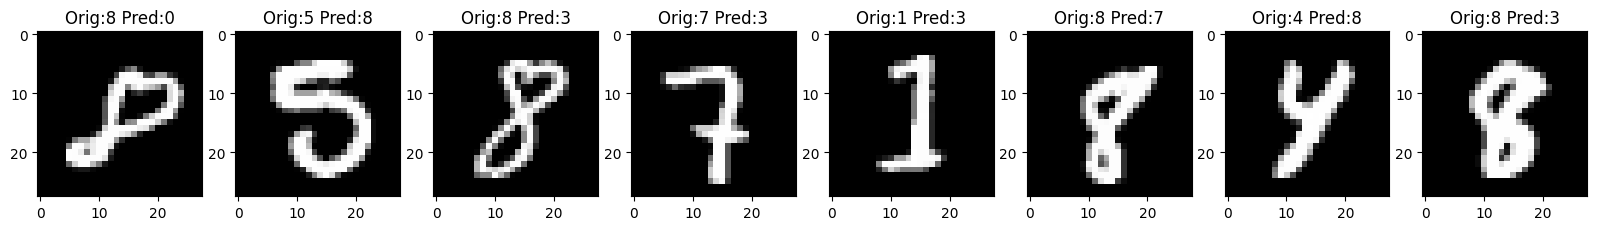

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), errors):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test.iloc[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test.iloc[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()